## <font color='darkblue'>Preface</font>
([article source](https://medium.datadriveninvestor.com/building-neural-network-using-keras-for-classification-3a3656c726c1)) <font size='3ptx'>**In this post we will learn a step by step approach to build a neural network using keras library for classification.**</font>

In order to under this article, below are prerequisites:
* [Understanding the Neural network](https://medium.com/datadriveninvestor/neural-network-simplified-c28b6614add4)
* [Activation functions](https://medium.com/datadriveninvestor/neural-networks-activation-functions-e371202b56ff)
* [Gradient descent](https://medium.com/datadriveninvestor/gradient-descent-5a13f385d403)
* [Evaluating the performance of a machine learning model](https://medium.com/datadriveninvestor/how-to-evaluate-the-performance-of-a-machine-learning-model-45063a7a38a7)

What is [**Keras**](https://keras.io/)?
* Keras is a high-level neural network API which is written in Python.
* It is capable of running on top of Tensorflow, CNTK, or Theano.
* Keras can be used as a deep learning library. Support Convolutional and Recurrent Neural Networks
* Prototyping with Keras is fast and easy
* Runs seamlessly on CPU and GPU

**We will build a neural network for binary classification**

### <font color='darkgreen'>DataSet</font>
For binary classification, we will use [Pima Indians diabetes database](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) for binary classification. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:
1. The number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)²).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

We will first import the basic libraries -[**Pandas**](https://pandas.pydata.org/) and [**numpy**](https://numpy.org/) along with data visualization libraries [**matplotlib**](https://matplotlib.org/) and [**seaborn**](https://seaborn.pydata.org/). Other libraries will be imported at the point of usage.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.layers import Dense
%matplotlib inline

In [6]:
pima_df = pd.read_csv(
    '../../datas/pima-indians-diabetes.data.csv', 
    names=[
        'time_pregnant', 
        'plasma', 
        'diastolic_blood_pressure',
        'triceps_skinfold_thickness',
        'two_hour_serum_insulin',
        'body_mass_index',
        'diabetes_pedigree_fuc',
        'age',
        'class'
    ])
pima_df.head()

,time_pregnant,plasma,diastolic_blood_pressure,triceps_skinfold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_fuc,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color='darkblue'>Data Exploratory and Analysis</font>
We need to check what type of data we have in the dataset:

In [7]:
pima_df.describe(include='all')

,time_pregnant,plasma,diastolic_blood_pressure,triceps_skinfold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_fuc,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that all features are numerical and do not have any categorical data. As we don’t have any categorical variables we do not need any data conversion of categorical variables.

We will visualize the data for a better understanding. We plot the data using [**Seaborn pairplot**](https://seaborn.pydata.org/generated/seaborn.pairplot.html) with the two classes in different color using the attribute hue.

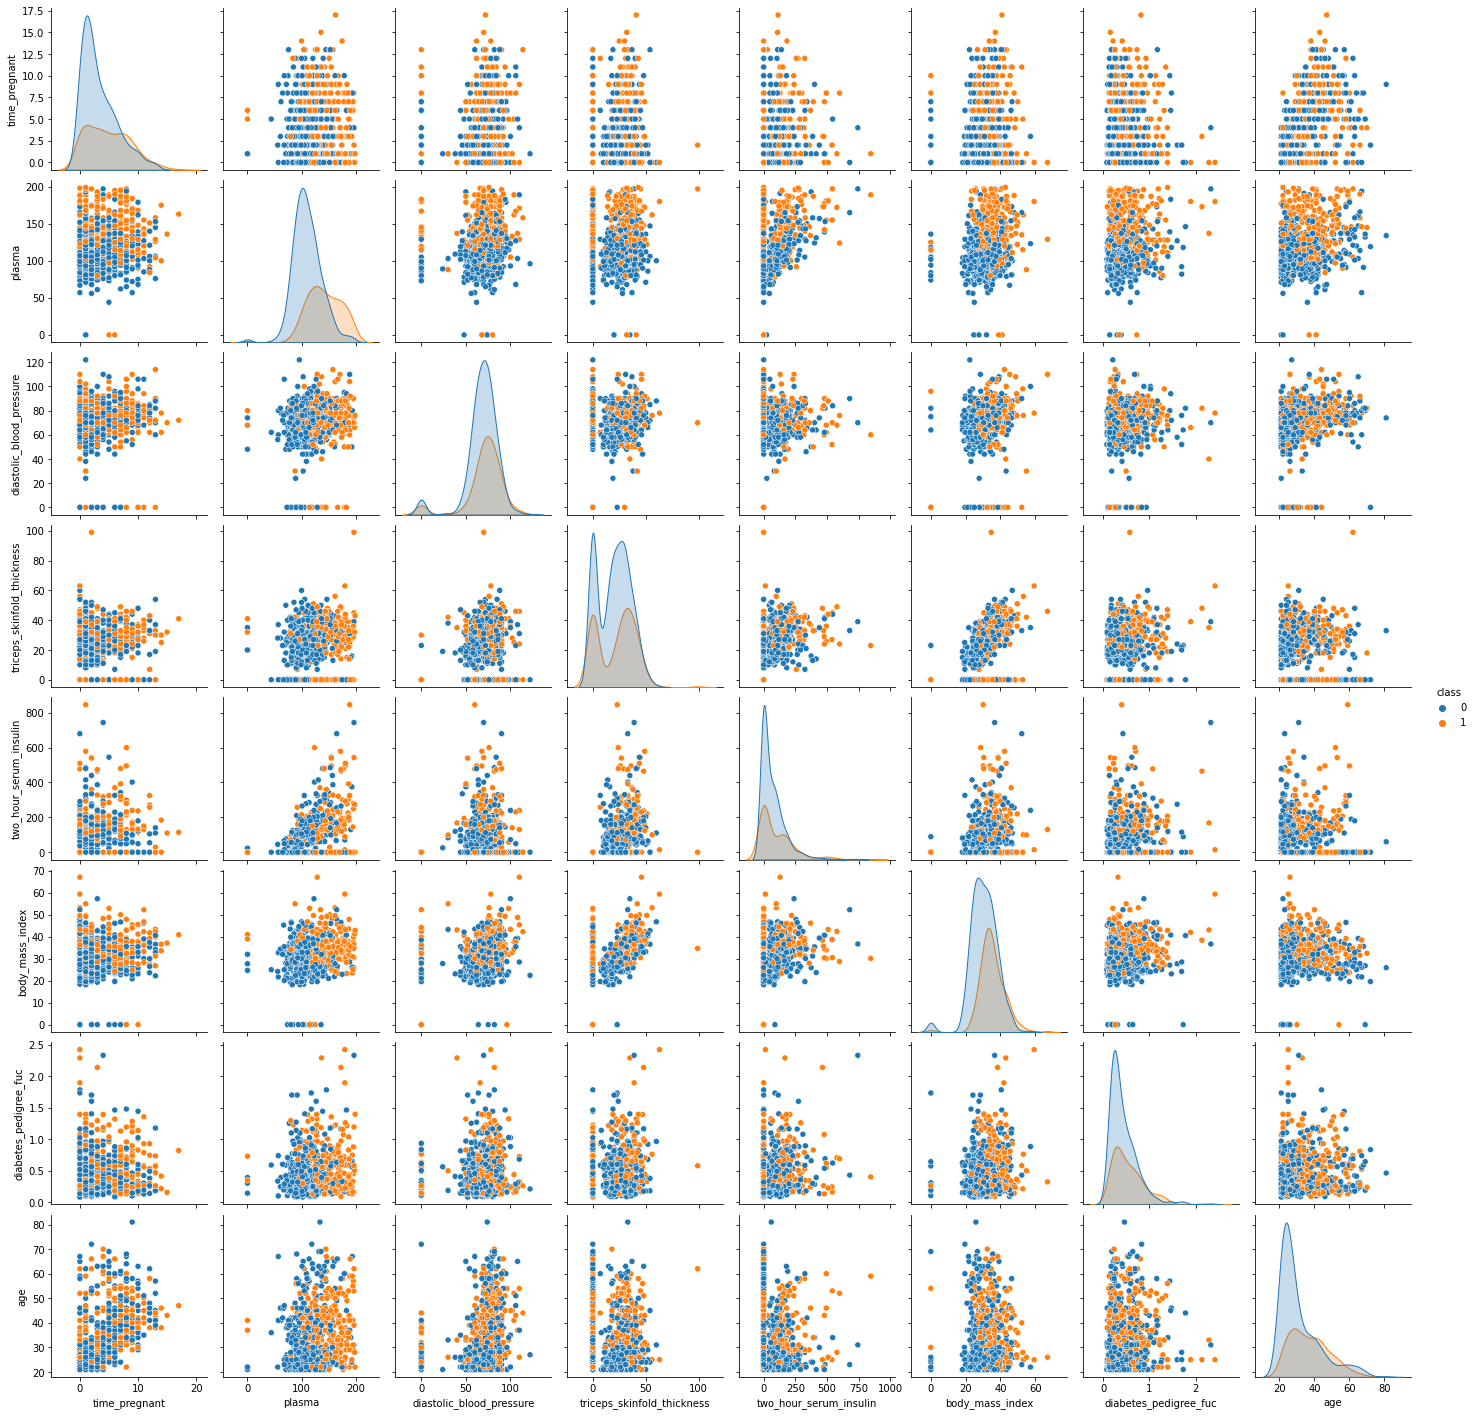

In [8]:
pg = sns.pairplot(pima_df, hue='class')

We plot the heatmap by using the correlation for the dataset. This helps us **eliminate any features that may not help with prediction.**

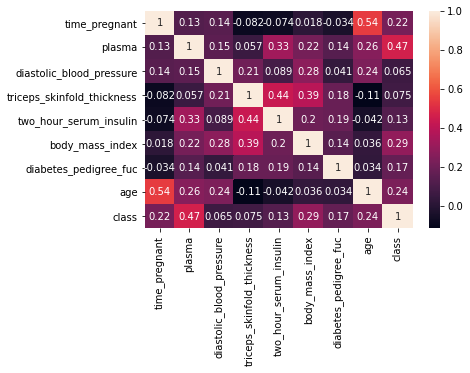

In [11]:
ax_subplot = sns.heatmap(pima_df.corr(), annot=True)

We see that all feature have some relationship with Class so we keep all of them. `plasma` has the strongest relationship with `class` (<font color='brown'>a person having diabetes or not</font>). `age` and `body_mass_index` are also strong influencers.

## <font color='darkblue'>Data Preprocess</font>
Now that we understand the data let’s **create the input features and the target variables and get the data ready for inputting it to our neural network by preprocessing the data.**

In [18]:
# creating input features and target variables
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]

let’s view our input features

In [14]:
X.sample(n=5)

,time_pregnant,plasma,diastolic_blood_pressure,triceps_skinfold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_fuc,age
350,4,92,80,0,0,42.2,0.237,29
163,2,100,64,23,0,29.7,0.368,21
314,7,109,80,31,0,35.9,1.127,43
81,2,74,0,0,0,0.0,0.102,22
69,4,146,85,27,100,28.9,0.189,27


Since our **input features are at different scales we need to standardize the input.**

In [19]:
#standardizing the input feature
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.sample(n=5)

,time_pregnant,plasma,diastolic_blood_pressure,triceps_skinfold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_fuc,age
390,-0.844885,-0.653939,-0.160546,0.530902,1.008957,0.000942,-0.084190,0.745293
505,1.827813,-1.436368,0.666618,-1.288212,-0.692891,0.165937,-0.630831,0.404942
659,-0.250952,-1.279882,0.666618,0.656358,-0.085088,0.280164,2.476871,-0.531023
610,-0.250952,-0.466156,-0.780919,0.029077,0.679007,-0.138669,-0.543248,-0.786286
396,-0.250952,-0.779128,-0.677523,0.844542,0.305642,-0.925569,1.425870,0.490030


We now split the input features and target variables into training dataset and test dataset. **out test dataset will be 30% of our entire dataset.**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We have preprocessed the data and we are now ready to build the neural network.

## <font color='darkblue'>Build ML Model</font>
We are using [**Keras**](https://keras.io/) to build our neural network. We import the keras library to create the neural network layers.

There are two main types of models available in keras — [**Sequential**](https://keras.io/api/models/sequential/) and [**Model**](https://keras.io/api/models/model/). we will use [**Sequential**](https://keras.io/api/models/sequential/) model to build our neural network. We use [**Dense**](https://keras.io/api/layers/core_layers/dense/) library to build input, hidden and output layers of a neural network.

We have 8 input features and one target variable. 2 Hidden layers. Each hidden layer will have 4 nodes. [**ReLu**](https://keras.io/api/layers/activation_layers/relu/) will be the activation function for hidden layers. As this is a binary classification problem we will use [**sigmoid**](https://keras.io/api/layers/activations/#sigmoid-function) as the activation function.

* **Dense layer implements**
> output = activation(dot(input, kernel) + bias)

kernel is the weight matrix. kernel initialization defines the way to set the initial random weights of Keras layers. **Random normal initializer generates tensors with a normal distribution.**

For uniform distribution, we can use Random uniform initializers. Keras provides multiple initializers for both kernel or weights as well as for bias units.
![1.png](images/1.png)
<br/>

In [23]:
classifier = Sequential()

#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Once the different layers are created we now compile the neural network.

As this is a binary classification problem, we use [**binary_crossentropy**](https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function) to calculate the loss function between the actual output and the predicted output.

To optimize our neural network we use **[Adam](https://keras.io/api/optimizers/adam/). Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.**

Momentum takes the past gradients into account in order to smooth out the gradient descent. we use accuracy as the metrics to measure the performance of the model

In [24]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

we now fit out training data to the model we created. we use a **<font color='violet'>batch_size</font> of 10. This implies that we use 10 samples per gradient update.** We iterate over 100 epochs to train the model. **An epoch is an iteration over the entire data set.**

In [25]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
54/54 [==============================] - 0s 452us/step - loss: 0.6912 - accuracy: 0.6525
Epoch 2/100
54/54 [==============================] - 0s 452us/step - loss: 0.6822 - accuracy: 0.6635
Epoch 3/100
54/54 [==============================] - 0s 452us/step - loss: 0.6616 - accuracy: 0.6715
Epoch 4/100
54/54 [==============================] - 0s 452us/step - loss: 0.6150 - accuracy: 0.6857
Epoch 5/100
54/54 [==============================] - 0s 452us/step - loss: 0.5883 - accuracy: 0.6241
Epoch 6/100
54/54 [==============================] - 0s 492us/step - loss: 0.5429 - accuracy: 0.6860
Epoch 7/100
54/54 [==============================] - 0s 433us/step - loss: 0.5141 - accuracy: 0.7729
Epoch 8/100
54/54 [==============================] - 0s 508us/step - loss: 0.4893 - accuracy: 0.7775
Epoch 9/100
54/54 [==============================] - 0s 452us/step - loss: 0.4908 - accuracy: 0.7816
Epoch 10/100
54/54 [==============================] - 0s 452us/step - loss: 0.4426 - accura

54/54 [==============================] - 0s 470us/step - loss: 0.4135 - accuracy: 0.8305
Epoch 82/100
54/54 [==============================] - 0s 489us/step - loss: 0.4220 - accuracy: 0.8106
Epoch 83/100
54/54 [==============================] - 0s 456us/step - loss: 0.4569 - accuracy: 0.7980
Epoch 84/100
54/54 [==============================] - 0s 489us/step - loss: 0.4332 - accuracy: 0.8176
Epoch 85/100
54/54 [==============================] - 0s 489us/step - loss: 0.3832 - accuracy: 0.8256
Epoch 86/100
54/54 [==============================] - 0s 433us/step - loss: 0.4106 - accuracy: 0.8124
Epoch 87/100
54/54 [==============================] - 0s 468us/step - loss: 0.4080 - accuracy: 0.8105
Epoch 88/100
54/54 [==============================] - 0s 452us/step - loss: 0.3984 - accuracy: 0.8258
Epoch 89/100
54/54 [==============================] - 0s 433us/step - loss: 0.4504 - accuracy: 0.7861
Epoch 90/100
54/54 [==============================] - 0s 433us/step - loss: 0.4245 - accuracy: 

After 100 epochs we get an accuracy of around 80%

We can also evaluate the loss value & metrics values for the model in test mode using evaluate function

In [27]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model  # Loss and accuracy of the mode;

17/17 [==============================] - 0s 460us/step - loss: 0.4215 - accuracy: 0.8063


[0.4214766025543213, 0.80633145570755]

We now predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [28]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

Now is the moment of truth. we check the accuracy on the test dataset

In [32]:
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

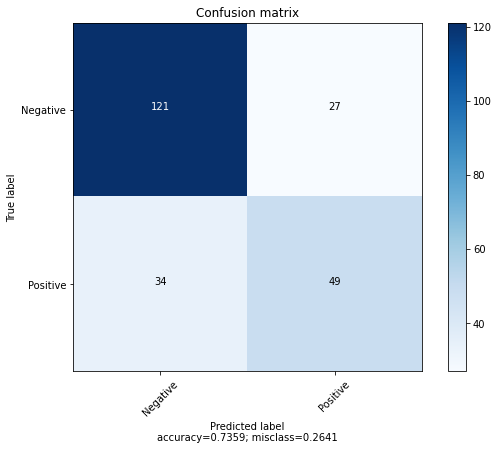

In [34]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Negative', 'Positive'], normalize=False)

Total of true positive and true negative is 83 out 149 observations in the test dataset. so our accuracy for test dataset is around 73%.